In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Exemple 1 : Intégration par Monte-Carlo classique

Simulations des variables gaussiennes, création des indicatrices et calcul de l'estimateur de Monte-Carlo :

In [2]:
def NormProbaEstimator(nb_sim, threshold = 2.5):
    sim = np.random.normal(size = nb_sim)
    dum = np.ones(nb_sim)*(sim > threshold)
    Proba = np.mean(dum)
    return Proba

Calcul de l'estimateur pour différentes valeurs de N entre 10 et 300 000 :

In [3]:
estimations = [NormProbaEstimator(n) for n in range(10, 300000,100)]

Comparaison avec la véritable valeur que l'on veut estimer :

In [4]:
from scipy.stats import norm
real_val = 1 - norm.cdf(2.5)

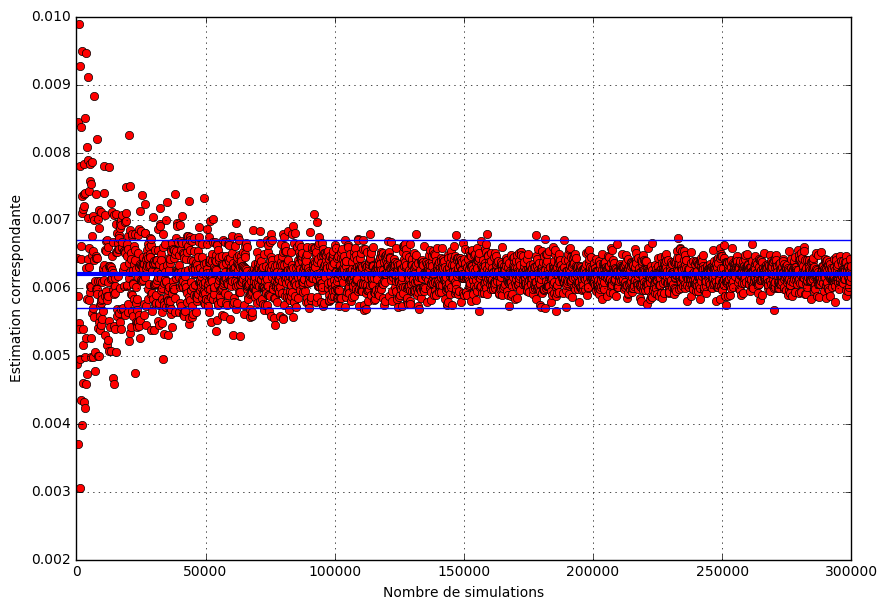

In [5]:
plt.figure(figsize=(10,7))
hlines(real_val, 0, 300000, 'blue', linewidths=3, zorder=2)
hlines(real_val + 0.0005, 0, 300000, 'blue', linewidths=1, zorder=2)
hlines(real_val - 0.0005, 0, 300000, 'blue', linewidths=1, zorder=2)

plt.plot(range(10, 300000,100),estimations, "ro", zorder=1)
plt.axis([0, 300000, 0.002, 0.01])
plt.xlabel("Nombre de simulations")
plt.ylabel("Estimation correspondante")
plt.grid(True)
plt.show()

# Exemple 2 : Optimisation par descente de gradient stochastique

Définition et représentation de la fonction à optimiser :

In [6]:
def f(x):
   return (np.cos(50*x) + np.sin(20*x))**2

In [7]:
ant = np.linspace(0,3,1000)

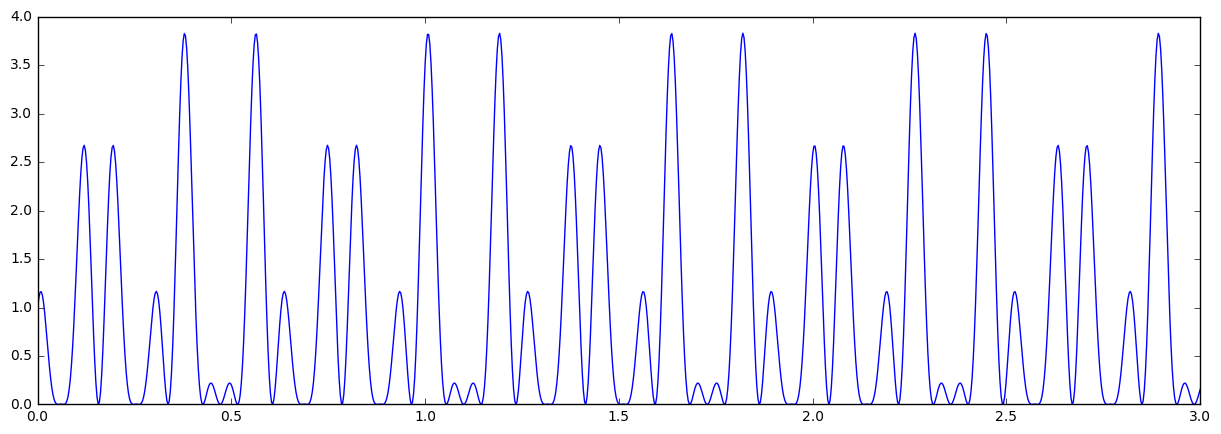

In [8]:
plt.figure(figsize=(15,5))
plt.plot(ant,list(map(lambda x:f(x),ant)))

Création des suites déterministes (alpha_j) et (beta_j) pour un nombre d'itérations de l'algorithme donné :

In [9]:
max_I = 100
def alpha(j) : return 1/(j+1)
def beta(j) : return 1/(j+1)**(0.1)
alpha_seq = vectorize(alpha)(range(max_I))
beta_seq = vectorize(beta)(range(max_I))

Itérations de la descente de gradient stochastique pour une maximisation de f sur [0,3] :

In [10]:
start = array([1.75])
theta = np.array(start)
iter = 0

while (iter < max_I) :
    if (theta[iter,] < 0 or theta[iter,] > 3 ) :
        theta[iter,] = start
    else :
        zeta = norm.rvs(0,1)
        zeta = zeta/np.sqrt(np.dot(np.transpose(zeta), zeta)) # On normalise le vecteur aléatoire
        grad = alpha_seq[iter]*zeta*(f(theta[iter,] + beta_seq[iter]*zeta) - 
                                     f(theta[iter,] - beta_seq[iter]*zeta)) / (2*beta_seq[iter])
        theta = vstack((theta,theta[iter,] + grad))
        # Si on souhaite stopper avec un seuil : dif = np.sqrt(np.dot(np.transpose(grad), grad))
        iter=iter+1

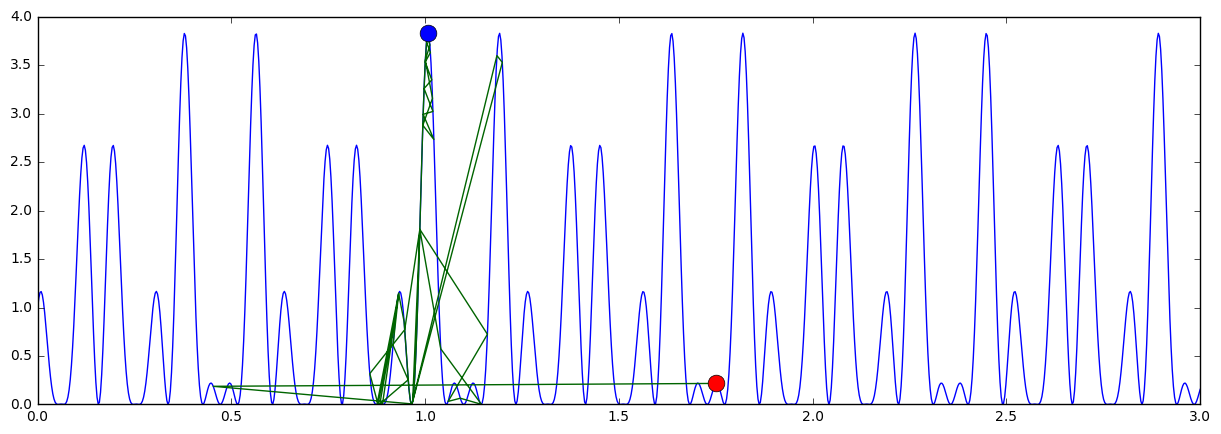

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ant,list(map(lambda x:f(x),ant)))
plt.plot(theta,vectorize(f)(theta), color="darkgreen")
plt.plot(list(theta[0]),list(vectorize(f)(theta)[0]), "ro", color="red",markersize=12)
plt.plot(list(theta[size(theta)-1]),list(vectorize(f)(theta)[size(theta)-1]), "ro", color="blue", markersize=12)

# Exemple 3 : Simulation d'une loi normale standard par RWMH

Définition de la densité cible :

In [12]:
f = norm.pdf

Random walk Metropolis-Hastings pour la simulation de cette densité avec densité instrumentale uniforme:

In [13]:
def RWMH(delta, N = 10000):
    X = np.empty(N)
    X[0]=1 # Initialisation arbitraire
    for i in range(1,N):
        low = -X[i-1]-delta
        high = -X[i-1]+delta
        Y = np.random.uniform(low = low, high = high)
        U = np.random.uniform(low = 0, high = 1)
        rho = min(f(Y)/f(X[i-1]),1)
        if U < rho :
            X[i]=Y
        else :
            X[i]=X[i-1]
    return X

In [14]:
X = RWMH(1.70)

La chaîne de Markov obtenue par cet algorithme :

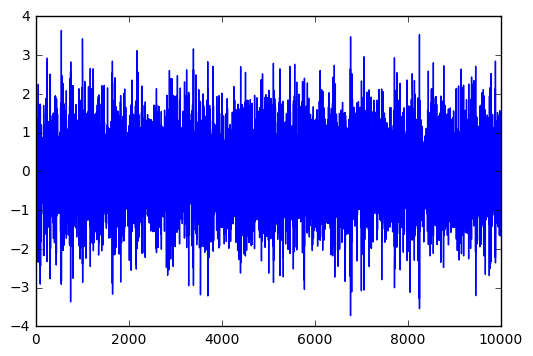

In [15]:
plt.plot(X)

Comparaison avec la vraie densité :

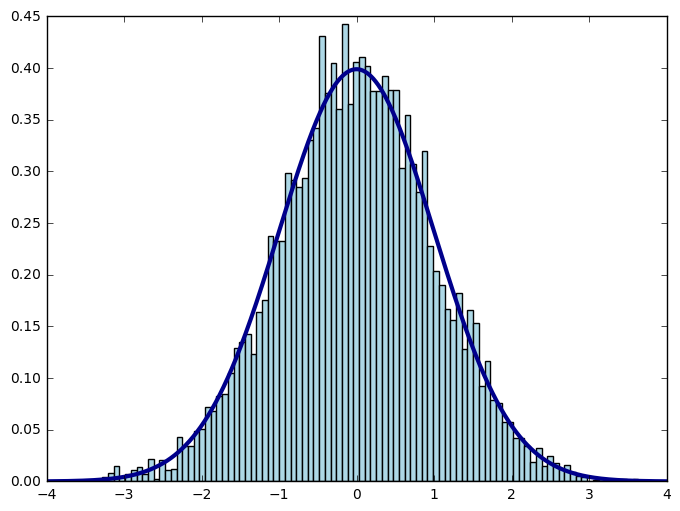

In [16]:
x = np.linspace(-4,4,10000)
y = f(x)
plt.figure(figsize=(8,6))
plt.hist(X, bins=100, normed=True, color="lightblue")
plt.plot(x,y, color="darkblue", lw=3)